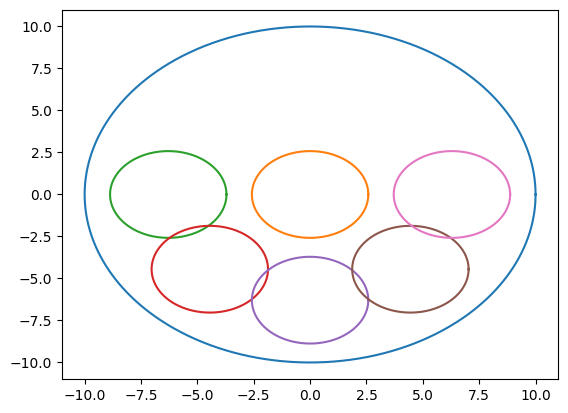

In [10]:
import numpy as np
import matplotlib.pyplot as plt
r = 10
theta = np.linspace(0, 2 * np.pi, 1000)
plt.plot(r * np.cos(theta), r * np.sin(theta))
bundle_area = np.pi * r ** 2
fibers = 15
fiber_area_estimate = bundle_area / fibers
fiber_r = np.sqrt(fiber_area_estimate / np.pi)
n_of_fibers = int(r / fiber_r)
radius_to_draw = np.linspace(0, r - fiber_r, n_of_fibers)
if radius_to_draw[-1] + 2 * fiber_r > r:
    radius_to_draw = radius_to_draw[:-1]
arc_length = np.pi * radius_to_draw
n_fibers_per_ring = (arc_length / fiber_r + 1).astype(int)
# plt.plot(fiber_r * np.cos(theta) - (r - (fiber_r + spacing)) * np.cos(3 * np.pi / 2), fiber_r * np.sin(theta) - (r - (fiber_r + spacing)) * np.sin(3 * np.pi / 2))
for i in range(0, int(len(n_fibers_per_ring) / 2 + 1)):
# for i in range(0, 2):
    thetas = np.linspace(0, np.pi, n_fibers_per_ring[i])
    for t in thetas:
        plt.plot(fiber_r * np.cos(theta) - ((radius_to_draw[i] + fiber_r * i) * np.cos(t)), fiber_r * np.sin(theta) - ((radius_to_draw[i] + fiber_r * i) * np.sin(t)))
plt.show()

2.0008342722308017
0.20008342722308017


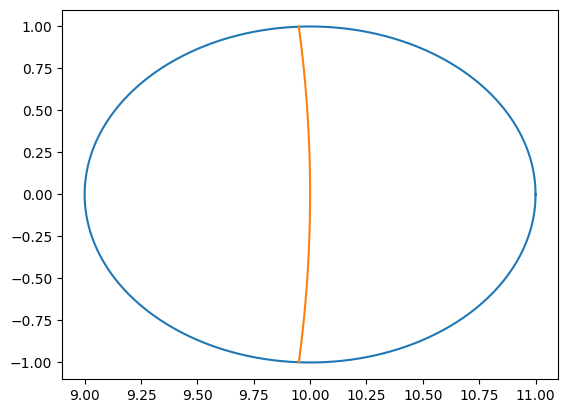

In [5]:
R = 10
r = 1
# plt.plot(R * np.cos(theta), R * np.sin(theta))
t = np.pi
plt.plot(r *  np.cos(theta) - R * np.cos(t), r * np.sin(theta) - R * np.sin(t))
arc_length = 2 * R * np.arccos(1 - r ** 2 / (2 * R ** 2))
print(arc_length)
print(arc_length / R)
t = np.linspace(-arc_length / R / 2, arc_length / R / 2, 100)
plt.plot(R * np.cos(t), R * np.sin(t))

1862


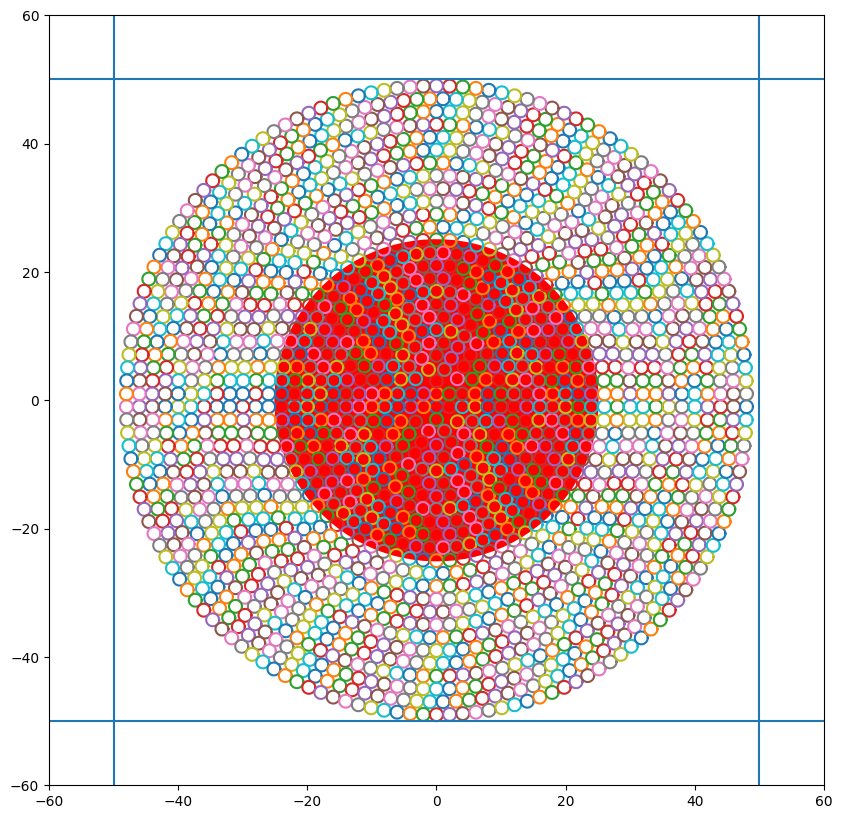

In [6]:
R = 50 # approximate outter radius. Sometimes the fiber bundle is under/over filled
window = 10
theta = np.linspace(0, 2 * np.pi, 100)
r = 1
t = 0
half_circle_R = R - r
r_steps = np.r_[r, np.linspace(2 * r, half_circle_R - half_circle_R % (2 * r), int(half_circle_R / (2 * r)))]
fibers = 0
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.set_xlim(-R - window, R + window)
ax.set_ylim(-R - window, R + window)
# ax.plot(R * np.cos(theta), R * np.sin(theta))
for i in range(0, len(r_steps)):
    thetas = np.linspace(0, np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) - r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) - r)
        fibers += 1
for i in range(0, len(r_steps)):
    thetas = np.linspace(np.pi, 2 * np.pi, int(np.pi / ((2 * r_steps[i] * np.arccos(1 - r ** 2 / (2 * r_steps[i] ** 2))) / r_steps[i])))
    for t in thetas:
        if i == 0:
            ax.plot(r * np.cos(theta), r * np.sin(theta) + r)
        else:
            ax.plot(r * np.cos(theta) - r_steps[i] * np.cos(t), r * np.sin(theta) - r_steps[i] * np.sin(t) + r)
        fibers += 1
laser = 25
ax.fill(laser * np.cos(theta), laser * np.sin(theta), zorder = -1, c = "r")
ax.axline((0, 50), (50, 50))
ax.axline((50, 50), (50, -50))
ax.axline((-50, -50), (50, -50))
ax.axline((-50, -50), (-50, 50))
print(fibers)
plt.show()

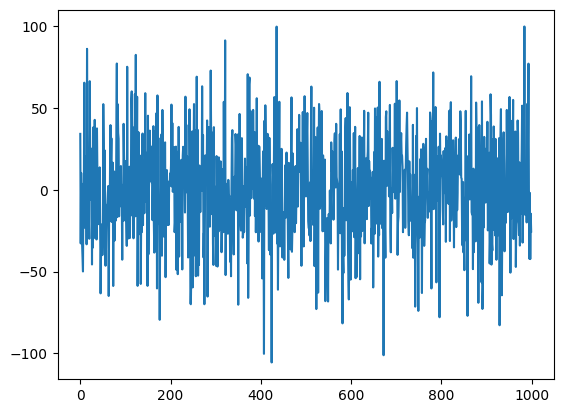

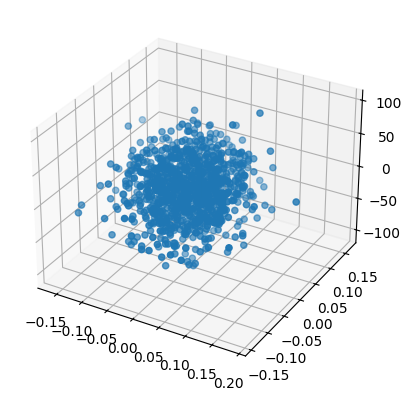

In [190]:
import fiber
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad as integrate
from laser import Laser, Ray
%autoreload 2
resolution = 10000
thetas = np.linspace(0, 2 * np.pi, resolution)
x, y = np.random.normal(0, 0.05, size = (2, 1000))
I = np.exp(-2 * np.sqrt(x ** 2 + y ** 2) / 1 ** 2) * np.random.normal(0, 1, size = 1000)
I = 100 * (I / np.max(I))
plt.plot(I)
plt.show()
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter(x, y, I)
# for i in range(5):
#     fig = plt.figure()
#     ax = plt.axes(projection = "3d")
#     waist1 = np.random.rand() * (1.1 - 0.9) + 0.9
#     x = np.linspace(-waist1 * 2, waist1 * 2, resolution)
#     intensity_profile1 = np.exp(-2 * x ** 2 / waist1 ** 2) * np.abs(np.random.normal(scale = waist1 * np.random.rand(), size = resolution))
#     intensity_profile1 = 50 * (intensity_profile1 / np.max(intensity_profile1))
#     waist2 = np.random.rand() * (1.1 - 0.9) + 0.9
#     y = np.linspace(-waist2 * 2, waist2 * 2, resolution)
#     intensity_profile2 = np.exp(-2 * y ** 2 / waist2 ** 2) * np.abs(np.random.normal(scale = waist2 * np.random.rand(), size = resolution))
#     intensity_profile2 = 50 * (intensity_profile2 / np.max(intensity_profile2))
#     ax.scatter(x, 0, intensity_profile1, zorder = 1 if waist1 < waist2 else 0)
#     ax.scatter(0, y, intensity_profile2, zorder = 1 if waist1 > waist2 else 0)
#     plt.show()
#     fig, ax = plt.subplots(1, 1)
#     ax.scatter(x, intensity_profile1, zorder = 1 if waist1 < waist2 else 0)
#     ax.scatter(y, intensity_profile2, zorder = 1 if waist1 > waist2 else 0)
#     plt.show()
#     fig = plt.figure()
#     ax = plt.axes(projection = "3d")
#     ax.plot(np.sqrt(x ** 2 + y ** 2) * np.cos(thetas), (x ** 2 + y ** 2) * np.sin(thetas), 1)
    
def gaussian(r):
    return 100 * np.exp((-2 * r ** 2))